##### TFIDF stands for term frequency- inverse document frequency.

    The TFIDF weight is used in text mining and IR. The weight is a measure used to evaluate how important a word is to a document in a collection of documents.

    When using a simple technique like a frequency table of the terms in the document, we remove stop words, punctuation and stem the word to its root. And then, the importance of the word is measured in terms of its frequency; higher the frequency, more important the word.

    In case of TFIDF, the only text pre-processing is removing punctuation and lower casing the words. We do not have to worry about the stop words.

    TFIDF is the product of the TF and IDF scores of the term.

    TF = number of times the term appears in the doc/total number of words in the doc

    IDF = ln(number of docs/number docs the term appears in)

    Higher the TFIDF score, the rarer the term is and vice-versa.

    TFIDF is successfully used by search engines like Google, as a ranking factor for content.

    The whole idea is to weigh down the frequent terms while scaling up the rare ones.

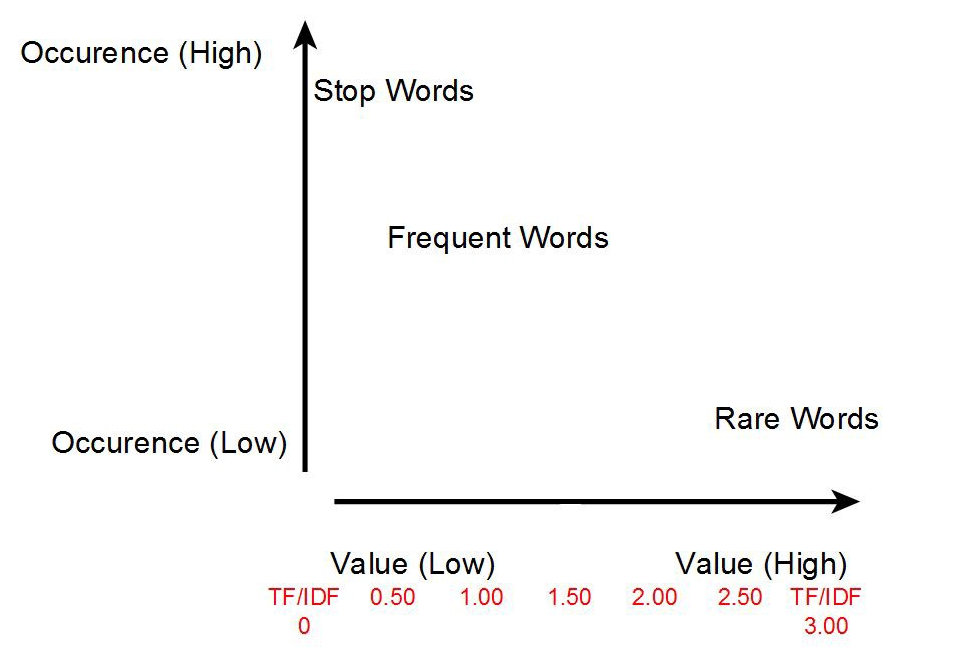

In [934]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Text data analysis\Images\TFIDF.png'
      ,width="555")

##### We are going to calculate the TFIDF score of each term in a piece of text. The text will be tokenized into sentences and each sentence is then considered a document.

In [787]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import math

In [928]:
text1 = """
If you like tuna and tomato sause- try combining the two.
It's really not as bad as it sounds.
If the Easter Bunny and the Tooth Fairy had babies would they take
your teeth and leave chocolate for you?
"""

In [865]:
print(text1)


If you like tuna and tomato sause- try combining the two.
It's really not as bad as it sounds.
If the Easter Bunny and the Tooth Fairy had babies would they take
your teeth and leave chocolate for you?



##### A very simple pre-processing function

In [873]:
def remove_string_special_characters(s):
    """
    This function removes special characters from within a string
    
    parameters:
        a(str):single input string
        
    return:
        stripped(str): A string with special characters removed
    """
    
    # Replace special characters with ''
    stripped = re.sub('[^\w\s]','',s)
    stripped = re.sub('_','',stripped)
    
    # change any whitespace to one space
#     stripped = re.sub('\s+','',stripped)
    
    # Remove start and end white spaces
    stripped = stripped.strip()
    
    return stripped 

##### The function to create the documents

In [876]:
def get_doc(text):
    """
    this function splits the text into sentences and considering each sentences as a document, calculates the total word of each
    """
    doc_info=[]
    i = 0
    for sent in text_sents_clean:
#     for sent in sent_tokenize(text):
        i +=1
        count = count_words(sent)
#         print(count)
        temp = {'doc_id': i, 'doc_length': count}
        doc_info.append(temp)
    return doc_info

In [877]:
def count_words(sent):
    """
    This function returns the total number of words in the input text
    """
    count = 0
    words = word_tokenize(sent)
    for word in words:
        count +=1
    return count

In [917]:
def create_freq_dict(sents):
    freq_dist_list = []
    i = 0
    for sent in sents:
        
        i+=1
        freq_dict={}
        words = word_tokenize(sent)
#         print('doc_id:',i)
#         print ('sentence:',sent)
#         print('words:',words)
        for word in words:
        
            word = word.lower()
            if word in freq_dict:
                freq_dict[word] +=1
            else:
                freq_dict[word] =1
            temp = {'doc_id':i, 'freq_dict':freq_dict}
            
        freq_dist_list.append(temp)
#         print('*'*122)
    #     return freq_dist_list
    #     print('temp',temp)
    #         print('freq_dict',freq_dict)
#         print(freq_dist_list)
#         print('*'*122)
    return freq_dist_list

In [854]:
def computeTF(doc_info,freqDict_list):
    """
    tf = (frequency of the term in the doc/total number of terms in the doc)
    """
    TF_scores = []
    for tempDict in freqDict_list:
        id = tempDict['doc_id']
        for k in tempDict['freq_dict']:
            temp = {'doc_id':id,
                   'TF_score': tempDict['freq_dict'][k]/doc_info[id-1]['doc_length'],
                    'key':k
                   }
            TF_scores.append(temp)
    return TF_scores    

In [855]:
def computeIDF(doc_info, freqDict_list):
    """
    idf = ln(total number of docs/number of docs with term in it)
    """
    IDF_scores=[]
    counter=0
    for dict in freqDict_list:
        counter +=1
        for k in dict['freq_dict'].keys():
            count=sum([k in tempDict['freq_dict'] for tempDict in freqDict_list])
            temp={'doc_id': counter, 'IDF_score': math.log(len(doc_info)/count), 'key':k}
            IDF_scores.append(temp)
    return IDF_scores

In [856]:
def computeTFIDF(TF_scores, IDF_scores):
    TFIDF_scores = []
    for j in IDF_scores:
        for i in TF_scores:
            if j['key'] == i['key'] and j['doc_id'] == i['doc_id']:
                temp = {'doc_id': j['doc_id'],
                       'TFIDF_score': j['IDF_score']*i['TF_score'],
                        'key': i['key']
                       }
        TFIDF_scores.append(temp)
    return TFIDF_scores

In [922]:
text1 = """
Athiq is the deep learning expert.
Athiq is a also a Machine a learning expert.
"""
print(text1)


Athiq is the deep learning expert.
Athiq is a also a Machine a learning expert.



The text is tokenized into sentences and cleaned of special charcaters. It is then made into a list of documents called doc_info.

The cleaned sentences, text_sents_clean, are passed into the create_freq_dict function.

In [929]:
text_sents = sent_tokenize(text1);print('text_sents: ',text_sents);print('*'*122)
text_words = word_tokenize(text1);print('text_words: ',text_words);print('*'*122)
text_sents_clean = [remove_string_special_characters(s) for s in text_sents];print('text_sents_clean: ',text_sents_clean);
print('*'*122)
doc_info = get_doc(text_sents_clean);print(doc_info)

text_sents:  ['\nIf you like tuna and tomato sause- try combining the two.', "It's really not as bad as it sounds.", 'If the Easter Bunny and the Tooth Fairy had babies would they take\nyour teeth and leave chocolate for you?']
**************************************************************************************************************************
text_words:  ['If', 'you', 'like', 'tuna', 'and', 'tomato', 'sause-', 'try', 'combining', 'the', 'two', '.', 'It', "'s", 'really', 'not', 'as', 'bad', 'as', 'it', 'sounds', '.', 'If', 'the', 'Easter', 'Bunny', 'and', 'the', 'Tooth', 'Fairy', 'had', 'babies', 'would', 'they', 'take', 'your', 'teeth', 'and', 'leave', 'chocolate', 'for', 'you', '?']
**************************************************************************************************************************
text_sents_clean:  ['If you like tuna and tomato sause try combining the two', 'Its really not as bad as it sounds', 'If the Easter Bunny and the Tooth Fairy had babies would th

In [930]:
freqDict_list = create_freq_dict(text_sents_clean)
print(freqDict_list)

[{'doc_id': 1, 'freq_dict': {'if': 1, 'you': 1, 'like': 1, 'tuna': 1, 'and': 1, 'tomato': 1, 'sause': 1, 'try': 1, 'combining': 1, 'the': 1, 'two': 1}}, {'doc_id': 2, 'freq_dict': {'its': 1, 'really': 1, 'not': 1, 'as': 2, 'bad': 1, 'it': 1, 'sounds': 1}}, {'doc_id': 3, 'freq_dict': {'if': 1, 'the': 2, 'easter': 1, 'bunny': 1, 'and': 2, 'tooth': 1, 'fairy': 1, 'had': 1, 'babies': 1, 'would': 1, 'they': 1, 'take': 1, 'your': 1, 'teeth': 1, 'leave': 1, 'chocolate': 1, 'for': 1, 'you': 1}}]


In [931]:
TF_scores = computeTF(doc_info,freqDict_list)
TF_scores

[{'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'if'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'you'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'like'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'tuna'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'and'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'tomato'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'sause'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'try'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'combining'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'the'},
 {'doc_id': 1, 'TF_score': 0.09090909090909091, 'key': 'two'},
 {'doc_id': 2, 'TF_score': 0.125, 'key': 'its'},
 {'doc_id': 2, 'TF_score': 0.125, 'key': 'really'},
 {'doc_id': 2, 'TF_score': 0.125, 'key': 'not'},
 {'doc_id': 2, 'TF_score': 0.25, 'key': 'as'},
 {'doc_id': 2, 'TF_score': 0.125, 'key': 'bad'},
 {'doc_id': 2, 'TF_score': 0.125, 'key': 'it'},
 

In [932]:
IDF_scores = computeIDF(doc_info,freqDict_list)
IDF_scores

[{'doc_id': 1, 'IDF_score': 0.4054651081081644, 'key': 'if'},
 {'doc_id': 1, 'IDF_score': 0.4054651081081644, 'key': 'you'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'like'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'tuna'},
 {'doc_id': 1, 'IDF_score': 0.4054651081081644, 'key': 'and'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'tomato'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'sause'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'try'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'combining'},
 {'doc_id': 1, 'IDF_score': 0.4054651081081644, 'key': 'the'},
 {'doc_id': 1, 'IDF_score': 1.0986122886681098, 'key': 'two'},
 {'doc_id': 2, 'IDF_score': 1.0986122886681098, 'key': 'its'},
 {'doc_id': 2, 'IDF_score': 1.0986122886681098, 'key': 'really'},
 {'doc_id': 2, 'IDF_score': 1.0986122886681098, 'key': 'not'},
 {'doc_id': 2, 'IDF_score': 1.0986122886681098, 'key': 'as'},
 {'doc_id': 2, 'IDF_score': 1.09861228866

In [933]:
TFIDF_score = computeTFIDF(TF_scores,IDF_scores)
TFIDF_score

[{'doc_id': 1, 'TFIDF_score': 0.036860464373469494, 'key': 'if'},
 {'doc_id': 1, 'TFIDF_score': 0.036860464373469494, 'key': 'you'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'like'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'tuna'},
 {'doc_id': 1, 'TFIDF_score': 0.036860464373469494, 'key': 'and'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'tomato'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'sause'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'try'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'combining'},
 {'doc_id': 1, 'TFIDF_score': 0.036860464373469494, 'key': 'the'},
 {'doc_id': 1, 'TFIDF_score': 0.09987384442437362, 'key': 'two'},
 {'doc_id': 2, 'TFIDF_score': 0.13732653608351372, 'key': 'its'},
 {'doc_id': 2, 'TFIDF_score': 0.13732653608351372, 'key': 'really'},
 {'doc_id': 2, 'TFIDF_score': 0.13732653608351372, 'key': 'not'},
 {'doc_id': 2, 'TFIDF_score': 0.27465307216702745, 'key':

##### 
    We can clearly see that the words that occur once have a higher TFIDF score than those that occur more than once, not just in the same sentence, but across all the input sentences

In [105]:
TF_scores = computeTF(doc_info,freqDict_list)
print(TF_scores)

[{'doc_id': 1, 'TF_score': 1.0, 'key': 'athiqisthedeeplearningexpertathiqisalsoamachinelearningexpert'}, {'doc_id': 2, 'TF_score': 1.0, 'key': 'heisgoodatmathsaswell'}]


In [108]:
IDF_scores = computeIDF(doc_info,freqDict_list)
print(IDF_scores)

[{'doc_id': 1, 'IDF_score': 0.6931471805599453, 'key': 'athiqisthedeeplearningexpertathiqisalsoamachinelearningexpert'}, {'doc_id': 2, 'IDF_score': 0.6931471805599453, 'key': 'heisgoodatmathsaswell'}]


In [67]:
print(text1)
print('*'*125)
print(word_tokenize(text1))


If you like tuna and tomato sause- try combining the two.
It's really not as bad as it sounds.
If the Easter Bunny and the Tooth Fairy had babies would they take
your teeth and leave chocolate for you?

*****************************************************************************************************************************
['If', 'you', 'like', 'tuna', 'and', 'tomato', 'sause-', 'try', 'combining', 'the', 'two', '.', 'It', "'s", 'really', 'not', 'as', 'bad', 'as', 'it', 'sounds', '.', 'If', 'the', 'Easter', 'Bunny', 'and', 'the', 'Tooth', 'Fairy', 'had', 'babies', 'would', 'they', 'take', 'your', 'teeth', 'and', 'leave', 'chocolate', 'for', 'you', '?']


In [68]:
text2 = 'Athiq is the deep learning expert. athiq is also a Machine learning expert.'

In [69]:
print(text2)
print('*'*125)
print(word_tokenize(text2))
print('*'*125)
print(sent_tokenize(text2))

Athiq is the deep learning expert. athiq is also a Machine learning expert.
*****************************************************************************************************************************
['Athiq', 'is', 'the', 'deep', 'learning', 'expert', '.', 'athiq', 'is', 'also', 'a', 'Machine', 'learning', 'expert', '.']
*****************************************************************************************************************************
['Athiq is the deep learning expert.', 'athiq is also a Machine learning expert.']


In [70]:
count_words(text2)

15

In [81]:
get_doc(text2)

[{'doc_id': 1, 'doc_length': 1},
 {'doc_id': 2, 'doc_length': 1},
 {'doc_id': 3, 'doc_length': 1}]

In [79]:
text_sents = sent_tokenize(text1)
text_sents

['\nIf you like tuna and tomato sause- try combining the two.',
 "It's really not as bad as it sounds.",
 'If the Easter Bunny and the Tooth Fairy had babies would they take\nyour teeth and leave chocolate for you?']

In [80]:
text_sents_clean = [remove_string_special_characters(s) for s in text_sents]
text_sents_clean

['Ifyouliketunaandtomatosausetrycombiningthetwo',
 'Itsreallynotasbadasitsounds',
 'IftheEasterBunnyandtheToothFairyhadbabieswouldtheytakeyourteethandleavechocolateforyou']

https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8